In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from scipy.stats import norm
import plotly.express as ex
import plotly 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

sns.set(style= 'whitegrid', color_codes=True)
sns.set_theme(context='notebook',style='darkgrid',
              palette='deep',font='sans-serif',font_scale=1,color_codes=True,rc=None)
%matplotlib inline



In [26]:
df = pd.read_csv("/Users/chiraghasija/Desktop/Projects/Football Data Analysis/FIFA-2019.csv")
df.sample(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
16001,16001,212063,A. Gafaiti,23,https://cdn.sofifa.org/players/4/19/212063.png,Algeria,https://cdn.sofifa.org/flags/97.png,58,66,Yeovil Town,...,45.0,58.0,61.0,54.0,15.0,14.0,12.0,6.0,7.0,€312K
7682,7682,172041,T. Mikkelsen,31,https://cdn.sofifa.org/players/4/19/172041.png,Denmark,https://cdn.sofifa.org/flags/13.png,67,67,Brisbane Roar,...,67.0,45.0,41.0,44.0,6.0,8.0,7.0,8.0,6.0,€844K
17803,17803,242044,G. Zuñiga,18,https://cdn.sofifa.org/players/4/19/242044.png,Chile,https://cdn.sofifa.org/flags/55.png,52,62,CD O'Higgins,...,36.0,53.0,57.0,53.0,6.0,11.0,9.0,7.0,8.0,€93K
6363,6363,228546,Omar Perdomo,24,https://cdn.sofifa.org/players/4/19/228546.png,Spain,https://cdn.sofifa.org/flags/45.png,69,72,Gimnàstic de Tarragona,...,62.0,44.0,34.0,30.0,14.0,11.0,7.0,16.0,11.0,€2.2M
1569,1569,176894,Mossoró,34,https://cdn.sofifa.org/players/4/19/176894.png,Brazil,https://cdn.sofifa.org/flags/54.png,76,76,Medipol Başakşehir FK,...,76.0,44.0,42.0,47.0,13.0,14.0,10.0,16.0,9.0,€7.4M


In [27]:
df.shape

(18207, 89)

In [28]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [29]:
# Which clubs are the most economical? How did you decide that?

In [30]:
# Data Processing for insiding
df.fillna(value=0, inplace=True)

# we have to convert these values into integers for further processing
df[['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']].head(3) 

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,...,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2
1,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,...,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3


In [31]:
def num_conversion(x):
    if type(x) == str:
        return eval(x)
    else:
        return x

In [32]:
# Converting the following columns from string to the integer value for evaluation.
columns = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM','RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']

# string to int convrsion
for col in columns :
    df[col] = df[col].apply(num_conversion) 

In [33]:
# Resulted Dataframe
df[['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']].head(1)

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,90,90,90,94,95,95,95,94,95,95,...,66,63,63,63,66,61,49,49,49,61


In [34]:
# need for Height and Weight Conversion to integer
df[['Height', 'Weight']].head(2)

,Height,Weight
0,5'7,159lbs
1,6'2,183lbs


In [35]:
def height_convr(x):
    if type(x)== str:
        y= x.split("'")
        return int(y[0]) * 12 + int(y[1])
    else:
        return int(x)

def weight_convr(x):
    if type(x) == str:
        return int(x.split('lbs')[0])
    else:
        return int(x)

In [36]:
df['Height'] = df['Height'].apply(height_convr)
df['Weight'] = df['Weight'].apply(weight_convr)

In [37]:
# Preprocessing the data to fill with meaningful data where some redundancy is there.
df['Body Type'][df['Body Type'] == 'Messi'] = 'Normal'
df['Body Type'][df['Body Type'] == 'Ronaldo'] = 'Lean'
df['Body Type'][df['Body Type'] == 'C. Ronaldo'] = 'Lean'
df['Body Type'][df['Body Type'] == 'Neymar'] = 'Lean'
df['Body Type'][df['Body Type'] == 'Courtois'] = 'Normal'
df['Body Type'][df['Body Type'] == 'PLAYER_BODY_TYPE_25'] = 'Normal'
df['Body Type'][df['Body Type'] == 'Shaqiri'] = 'Lean'
df['Body Type'][df['Body Type'] == 'Akinfenwa'] = 'Normal'
df['Body Type'][df['Body Type'] == 0] = 'Normal'
df['Preferred Foot'][df['Preferred Foot'] == 0] = 'NA'
df['Work Rate'][df['Work Rate'] == 0] = 'Medium/ Medium'
df['Real Face'][df['Real Face'] == 0] = 'No'
df['Position'][df['Position'] == 0] = 'NA'

/var/folders/q5/j9bmd9y90r78jq2lslvm43180000gn/T/ipykernel_22260/437619641.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Body Type'][df['Body Type'] == 'Messi'] = 'Normal'
/var/folders/q5/j9bmd9y90r78jq2lslvm43180000gn/T/ipykernel_22260/437619641.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Body Type'][df['Body Type'] == 'Ronaldo'] = 'Lean'
/var/folders/q5/j9bmd9y90r78jq2lslvm43180000gn/T/ipykernel_22260/437619641.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [59]:
# Evaluating the Wage and Value attributes to their proper integer value

df['Wage'] = wage.replace({'€':'','K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int) 

In [60]:
# replacing '€' symbol with ''

df['Value'] = value.replace({'€':'','K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)

In [61]:
df['Club'].nunique() 

652

In [62]:
# There are 652 unique clubs present in the dataset

In [63]:
clubData = {'Club': df.Club, 'Overall' : df.Overall, 
            'Wage': df.Wage}

clubDataDf = pd.DataFrame(clubData, columns = ['Club', 'Overall', 'Wage'])
clubDataDf.sample(3)

,Club,Overall,Wage
15346,Al Hazem,59,2000
14730,IF Brommapojkarna,60,1000
4793,Portimonense SC,70,5000


In [64]:
# fifadata.Club.value_counts()
dct = dict(df.Club.value_counts())
def findValue(x):
    return dct[x]

In [68]:
clubDataDf.dropna(inplace = True)
overallList =[]
p = 0

''' Dividing the Overall of each row by the Club count so 
 that when we do groupby, we get the appropriate mean 
 Overall value for the club ( kind a normalization )''' 

for i in clubDataDf.values:
    overallList.append( i[1] / findValue( i[0] ) ) 
    
x = np.reshape(overallList, (len(overallList), 1)) 
new_club_data = clubDataDf.drop(columns = ['Overall'], inplace = False)
new_club_data['Overall'] = x

In [69]:
new_club_data['Overall'].isnull().unique().sum()

0

In [70]:
# Grouping the data by the Clubs and taking their sum

new_club_df = new_club_data.groupby(by = 'Club', 
                                      as_index=False).sum() 

new_club_df['Economy'] = new_club_df['Overall'] / new_club_df['Wage']

In [71]:
# Interpreatation of Economy : How much overall a Club can get for every Euro spent.

In [74]:
# Top 12 economical Clubs
top_12_club= new_club_df.sort_values(by=['Economy'], ascending=True).head(12) 

In [75]:
ex.bar(x = top_12_club.Club, y = top_12_club.Economy, 
       width=650, height=500, labels={'y':'Economy', 'x':'Clubs'}
       , color=top_12_club.Economy, )

In [76]:
# Real MAdrid has best Economy.

In [77]:
# What is the relationship between age and individual potential of the player?
# How does age influence the players' value?
# At what age does the player exhibit peak pace ?

In [78]:
# Age, Potential, SprintSpeed
data = {'Age': df.Age, 'Potential' : df.Potential}

perf_df = pd.DataFrame(data, columns = ['Age', 'Potential'])
perf_df.sample(3)

,Age,Potential
10093,26,66
4479,25,76
11538,22,72


In [79]:
ex.box(x='Age', y='Potential', data_frame= perf_df, color='Age', boxmode='overlay', notched=True, )

<AxesSubplot:xlabel='Age', ylabel='Potential'>

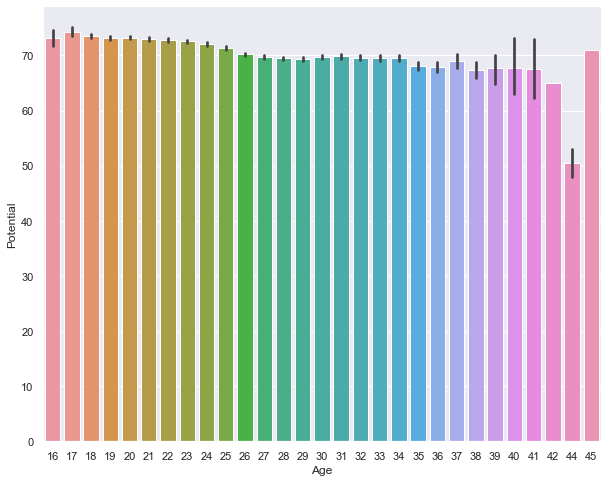

In [80]:
plt.figure(figsize=(10,8))
sns.barplot(x = 'Age', y = 'Potential', data = perf_df)

In [81]:
#From Above Plots:
#We can observe that the Age is inversely proportional to the Potential of the player.
#A player shows average peak potential at the age of 17 and the maximum potential at the age of 19 which can be seen as an outlier in the boxplot. After that it decreases and remain almost the same till the age of 34.
#There are also a lot of outliers which indicates that despite being of higher ager, the player shows higher potential which is an exception for some cases.

In [82]:
#We can also observe the same through the correlation matrix below.

In [83]:
scaler = StandardScaler()

perf_df_standardised = scaler.fit_transform(perf_df[['Age','Potential']])
perf_df_standardised = pd.DataFrame(perf_df_standardised, columns = ['Age', 'Potential'])
perf_df_standardised.corr()

,Age,Potential
Age,1.000000,-0.253312
Potential,-0.253312,1.000000


<AxesSubplot:>

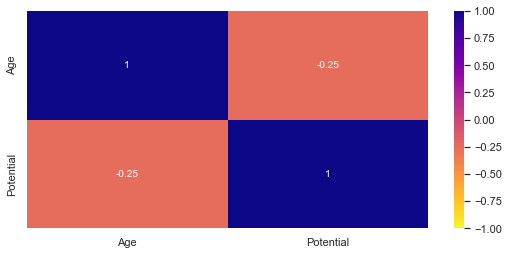

In [84]:
# As it is negative value in the correlation matrix, 
# we can conclude that Age and Potential are inversely proportional.
plt.figure(figsize=(9,4))
sns.heatmap(perf_df.corr(),vmin=-1,cmap='plasma_r',annot=True)

In [85]:
perf_df['Value'] = df['Value']
perf_df.sample(3)

,Age,Potential,Value
5025,28,70,1400000
7910,30,67,575000
12519,22,74,625000


In [86]:
ex.scatter(x='Age', y='Value', data_frame=perf_df,
           color='Age', opacity=0.6, marginal_x='box')

In [89]:
#There is a steep increase in the Value of a Player till the age of 27-28 years 
#and after that it gradually starts decreasing, 
#It hits the lowest at the age of 45 and the Value hits the highest in the age between 25-30.

In [90]:
ageValue_df = scaler.transform(perf_df[['Age','Value']])
ageValue_df = pd.DataFrame(ageValue_df, columns = ['Age','Value'])
ageValue_df.corr()

/Users/chiraghasija/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Value
Feature names seen at fit time, yet now missing:
- Potential




,Age,Value
Age,1.000000,0.075022
Value,0.075022,1.000000


<AxesSubplot:>

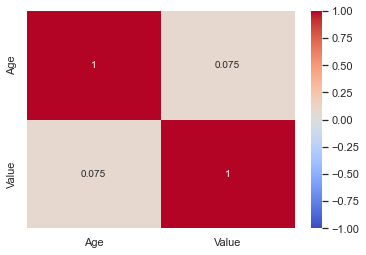

In [91]:
# not a very strong relationship. With the heatmap it can seen that Value is not impacted much by Age.
sns.heatmap(ageValue_df.corr(), vmin=-1,cmap='coolwarm',annot=True)

In [92]:
perf_df['Pace'] = df.SprintSpeed

In [93]:
mean_pace = np.mean(perf_df['Pace'])
mean_pace = round(mean_pace, 1)
perf_df['Pace'].fillna(value = mean_pace, inplace = True)
perf_df.sample(3)

,Age,Potential,Value,Pace
8332,21,75,975000,70.0
5639,28,70,950000,62.0
2160,33,74,2300000,43.0


<Figure size 1080x360 with 0 Axes>

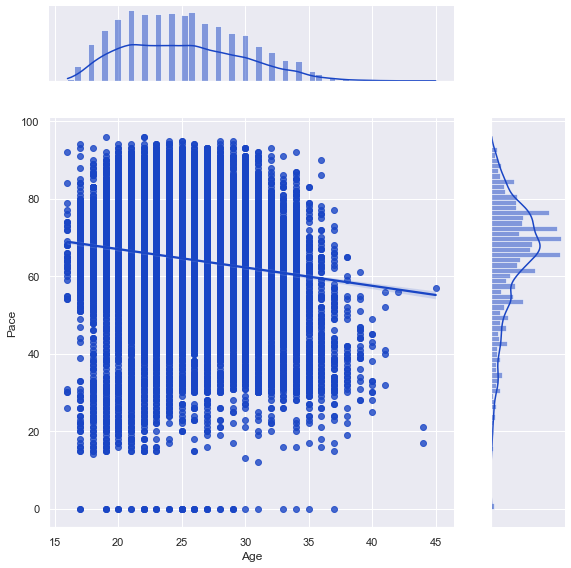

In [94]:
plt.figure(figsize=(15,5))
sns.jointplot(x= perf_df['Age'], y= perf_df['Pace'], 
              kind = 'reg', space=0.5, color='#1945c5', ratio=4, height=8)
plt.show()

In [95]:
# The player attains maximum pace towards the age of 20years(20-24years approx).
# It can be seen that the Pace data is right skewed with mean almost at 65.
# The pace of a player is at the lowest at the age of 45

In [96]:
# What skill sets are helpful in deciding a player's potential?
# How do the traits contribute to the players' potential?

In [97]:
# skill sets to decide a player's potential 
skill_df = df[["Crossing","Finishing","HeadingAccuracy","ShortPassing","Volleys","Dribbling","Curve","FKAccuracy",
                         "LongPassing","BallControl","Acceleration","SprintSpeed","Agility","Reactions","Balance","ShotPower",
                         "Jumping","Stamina","Strength","LongShots","Aggression","Interceptions","Positioning","Vision",
                         "Penalties","Composure","Marking","StandingTackle","SlidingTackle","GKDiving","GKHandling","GKKicking",
                         "GKPositioning","GKReflexes", "Potential"]]
skill_df.drop_duplicates().sample(3)

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Potential
1039,55.0,39.0,76.0,76.0,31.0,58.0,30.0,35.0,72.0,73.0,...,69.0,76.0,77.0,78.0,8.0,12.0,11.0,9.0,7.0,83
1486,75.0,60.0,60.0,75.0,59.0,76.0,84.0,77.0,72.0,73.0,...,80.0,76.0,74.0,77.0,13.0,13.0,9.0,8.0,12.0,76
5356,14.0,19.0,15.0,25.0,12.0,13.0,20.0,15.0,19.0,23.0,...,52.0,15.0,13.0,17.0,74.0,72.0,75.0,68.0,70.0,78


In [98]:
# replacing the null values with the minimum of the column values
for index in skill_df.columns :
    skill_df[index].fillna(value = skill_df[index].min(), inplace = True)

/var/folders/q5/j9bmd9y90r78jq2lslvm43180000gn/T/ipykernel_22260/3431328414.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:>

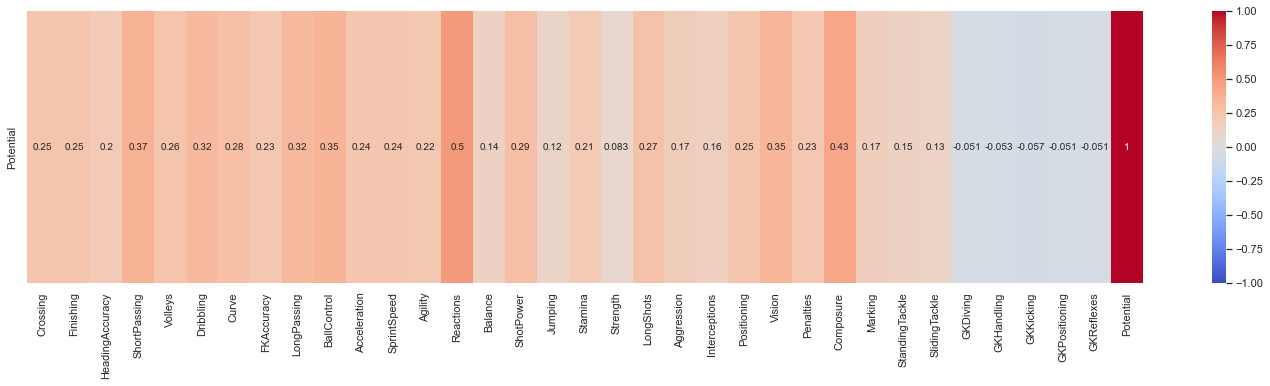

In [99]:
plt.figure(figsize=(25,5))
a = skill_df.corr().loc['Potential':]
sns.heatmap(a, vmin=-1, cmap='coolwarm', annot = True)

In [100]:
# From the Heatmap, we can observe that Reactions, Composure, Vision and ShortPassing are the only columns which have comparatively greater impact on the Potentail of a player

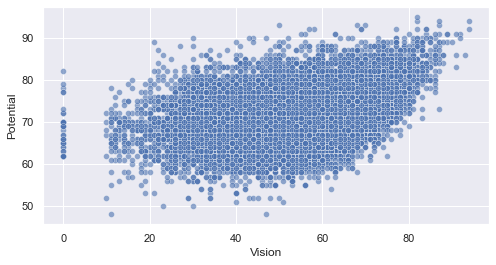

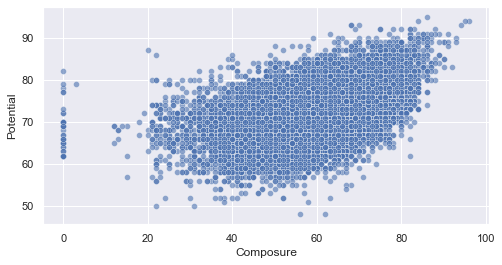

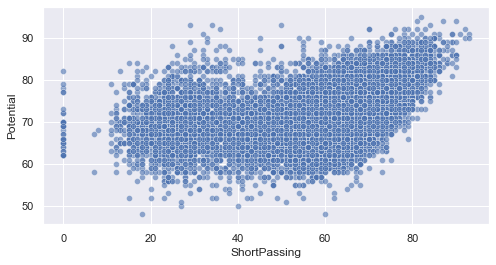

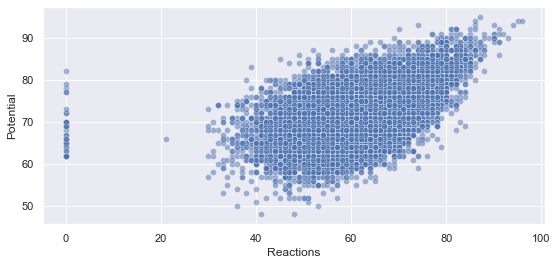

In [101]:
plt.figure(figsize=(8,4))
sns.scatterplot(x = 'Vision', y = 'Potential', data = skill_df, alpha=0.6)
plt.show()
plt.figure(figsize=(8,4))
sns.scatterplot(x = 'Composure', y = 'Potential', data = skill_df, alpha=0.6)
plt.show()
plt.figure(figsize=(8,4))
sns.scatterplot(x = 'ShortPassing', y = 'Potential', data = skill_df, alpha=0.6)
plt.show()
plt.figure(figsize=(9,4))
sns.scatterplot(x = 'Reactions', y = 'Potential', data = skill_df, palette='Bules_d', alpha=0.5)
plt.show()

In [102]:
# Traits vs Player's Potential
trails_potential_df = {'Special' : df['Special'], 'Height' : df['Height'], 'Weight' : df['Weight'],
                      'Agility' : df['Agility'], 'Composure' : df['Composure'], 'Potential' : df['Potential']}
trails_potential_df = pd.DataFrame(trails_potential_df)
trails_potential_df.sample(4)

,Special,Height,Weight,Agility,Composure,Potential
10052,1710,74,183,50.0,61.0,66
58,2110,69,152,91.0,80.0,87
13428,1717,69,152,82.0,55.0,69
3813,1052,76,198,44.0,58.0,72


In [103]:
scaler = StandardScaler()
trails_potential_df[['Special', 'Weight', 'Height', 'Agility', 'Composure', 'Potential']] = scaler.fit_transform(trails_potential_df[['Special', 'Weight', 'Height', 'Agility', 'Composure', 'Potential']])
trails_potential_df.sample(4)

,Special,Height,Weight,Agility,Composure,Potential
7863,0.378570,-0.481233,-0.255914,-0.485795,0.974284,-0.538971
10380,-2.527015,0.183111,0.871074,-2.737238,-0.634515,1.253633
8022,1.009581,0.183111,-0.030516,0.507489,0.042874,0.601777
14856,-2.167485,0.183111,-0.255914,-0.485795,-1.396578,-0.538971


In [104]:
potential = trails_potential_df.corr().loc['Potential':]
potential

,Special,Height,Weight,Agility,Composure,Potential
Potential,0.383727,0.024638,0.011892,0.224803,0.434343,1.0


<AxesSubplot:>

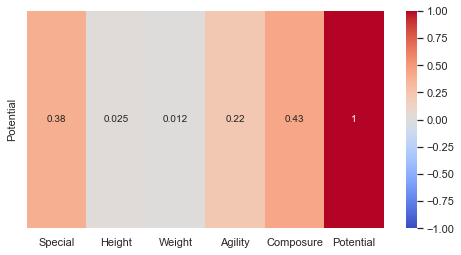

In [105]:
plt.figure(figsize=(8,4))
sns.heatmap(potential, vmin=-1, cmap='coolwarm', annot = True)

In [106]:
# From the heatmap, we can observe that Composure, Special and Agility have the highest impact among others towards the Potential of a player.

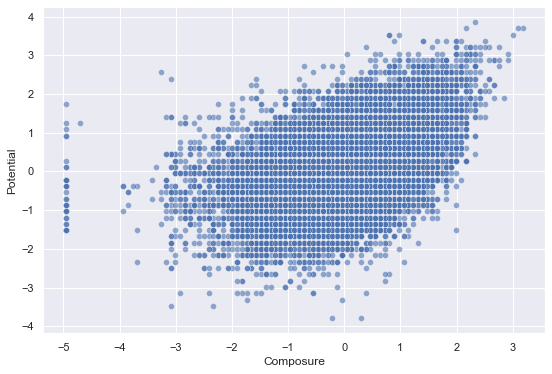

In [107]:
plt.figure(figsize=(9,6))
sns.scatterplot(x = 'Composure', y = 'Potential', data = trails_potential_df, alpha=0.6)
plt.show()

<AxesSubplot:xlabel='Special', ylabel='Potential'>

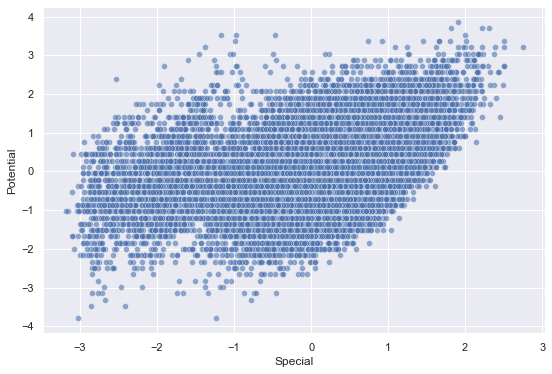

In [108]:
plt.figure(figsize=(9,6))
sns.scatterplot(x = 'Special', y = 'Potential', data = trails_potential_df, alpha=0.6)

In [109]:
# Which features directly contribute to the wages of the players?

In [110]:
wage_data = {'Potential' : df['Potential'], 'Overall' : df['Overall'], 'Value' : df['Value'],
             'Special' : df['Special'], 'International Reputation' : df['International Reputation'],
             'Wage' : df['Wage']}
wage_df = pd.DataFrame(wage_data)
wage_df.sample(3)

,Potential,Overall,Value,Special,International Reputation,Wage
15891,65,58,130000,1022,1.0,1000
1834,75,75,6500000,1877,3.0,10000
51,87,87,34000000,2079,3.0,155000


In [111]:
# Need to replace null values. 
# we will fill it with International Reputation as 0
wage_df['International Reputation'].unique()

array([5., 4., 3., 2., 1., 0.])

In [112]:
wage_df['International Reputation'].fillna(value=0, inplace=True)

In [113]:
wage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Potential                 18207 non-null  int64  
 1   Overall                   18207 non-null  int64  
 2   Value                     18207 non-null  int64  
 3   Special                   18207 non-null  int64  
 4   International Reputation  18207 non-null  float64
 5   Wage                      18207 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 853.6 KB


In [114]:
scaler = StandardScaler()
wage_df[['Value', 'Wage', 'Special']] = scaler.fit_transform(wage_df[['Value', 'Wage', 'Special']])
wage_df.sample(4)

,Potential,Overall,Value,Special,International Reputation,Wage
12106,63,63,-0.377262,0.004366,1.0,-0.351444
13935,79,62,-0.310235,-0.501910,1.0,-0.215072
12274,68,63,-0.359388,0.525317,1.0,-0.305987
13942,62,62,-0.377262,0.162119,1.0,-0.396902


<AxesSubplot:>

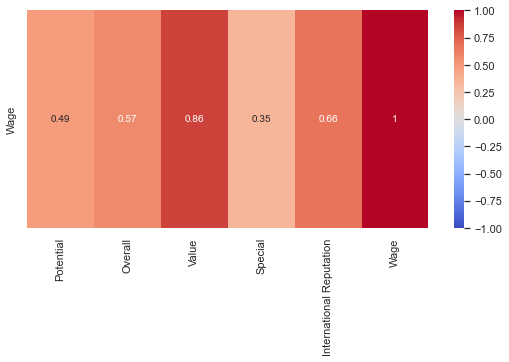

In [115]:
wage_corr_matrix = wage_df.corr().loc['Wage':]
plt.figure(figsize=(9,4))
sns.heatmap(wage_corr_matrix, vmin=-1, cmap='coolwarm', annot = True)

<AxesSubplot:xlabel='Value', ylabel='Wage'>

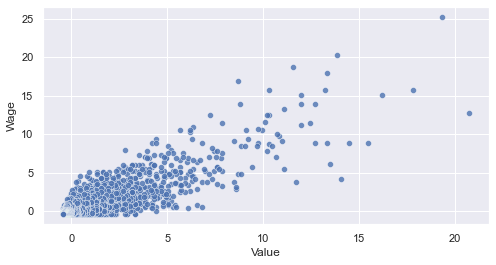

In [116]:
plt.figure(figsize=(8,4))
sns.scatterplot(x = 'Value', y ='Wage', data = wage_df, alpha=0.8)

In [117]:
# So the Wage of a player is directly proprtional to the Value of a player. If the value of the player increases, the wage of the player also increases monotonically. This is also seen from the Heatmap.

<AxesSubplot:xlabel='International Reputation', ylabel='Wage'>

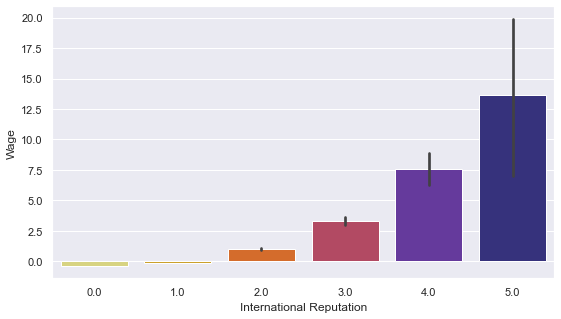

In [118]:
plt.figure(figsize=(9,5))
sns.barplot(x = 'International Reputation', y ='Wage', 
            palette='CMRmap_r' ,data = wage_df)

In [119]:
# Same goes for the International Feature of the player.
# The value increases if the Internaional Reputation of a player increases

In [120]:
# What is the age distribution in different clubs?
# Which club has most players young?

In [121]:
data = {'Age': df['Age'], 'Club' : df['Club']}
age_club_df = pd.DataFrame(data)
age_club_df.sort_values(by='Age').sample(3)

,Age,Club
10620,17,Paris Saint-Germain
16067,22,Lecce
6582,25,LA Galaxy


In [122]:
# grouping the data by clubs and getting their mean age
datas = age_club_df.groupby(by='Club', as_index=False).mean() 
datas = datas.sort_values(by = 'Age', ascending = True)

# sorting the grouped by club data according to age in order to get youngest age group club in the beginning
datas.head(10) 

,Club,Age
232,FC Nordsjælland,20.259259
222,FC Groningen,21.423077
84,Bohemian FC,21.480000
238,FC Sochaux-Montbéliard,21.678571
211,FC Admira Wacker Mödling,21.925926
349,LOSC Lille,22.000000
203,Envigado FC,22.035714
560,Stabæk Fotball,22.074074
72,Barnsley,22.107143
189,Derry City,22.111111


In [123]:
# FC Nordsjælland club has the most young players

In [124]:
ex.bar(x = 'Club', y = 'Age', data_frame= datas.head(15),
      color='Club')